Libraries

In [120]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model,Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import glob

In [121]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17911611965741362220
xla_global_id: -1
]


Data Preparation

In [122]:
filenames = glob.glob('face_mini/**/*.jpg', recursive=True)

all_images = []
for i in filenames:
    img = image.load_img(i, target_size=(100,100,3), interpolation="nearest")
    img = image.img_to_array(img)
    img = img / 255
    all_images.append(img)

all_images = np.array(all_images)
print(all_images.shape)
train_x, test_x = train_test_split(all_images, random_state=32, test_size=0.3)
train_x, val_x = train_test_split(train_x, random_state=32, test_size=0.3)


(3203, 100, 100, 3)


Add noise

In [123]:
# add noise 
noise_factor = 0.2 # 0-1

Nmean = 0
Nstd = 1

x_train_noisy = train_x + (noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=train_x.shape))

x_val_noisy = val_x + (noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=val_x.shape))

x_test_noisy = test_x + (noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=test_x.shape))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


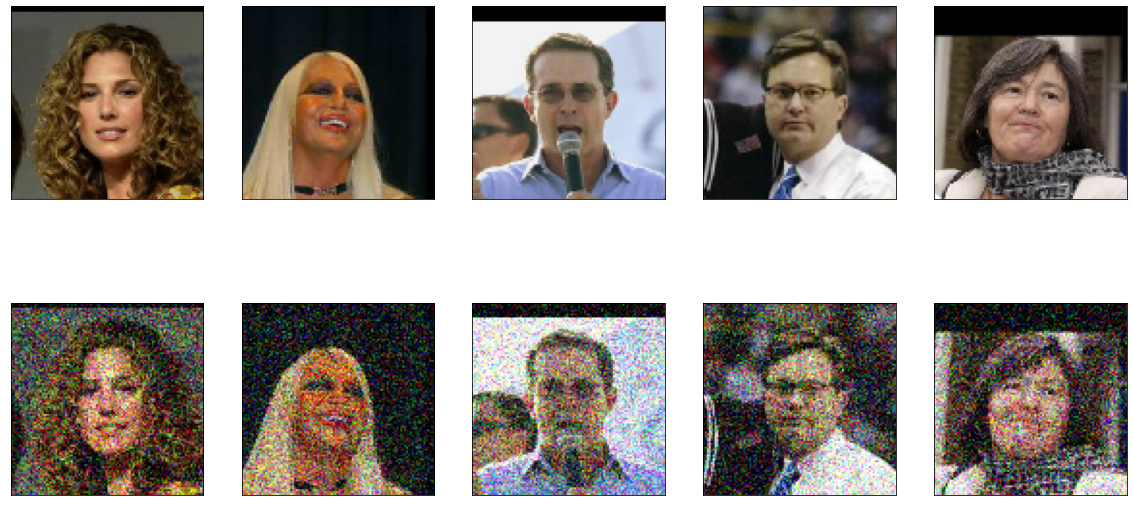

In [124]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(val_x[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(x_val_noisy[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

Autoencoder model

In [125]:
Input_img = Input(shape=(100, 100, 3))

x1 = Conv2D(256,(3,3), activation='relu',padding='same')(Input_img)
x2 = Conv2D(128,(3,3), activation='relu',padding='same')(x1)
x2 = MaxPool2D((2,2))(x2)
encoded = Conv2D(64,(3,3), activation='relu', padding='same')(x2)

x3 = Conv2D(64,(3,3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2,2))(x3)
x4 = Conv2D(128,(3,3), activation='relu', padding='same')(x3)
x5 = Conv2D(256,(3,3), activation='relu', padding='same')(x4)

decoded = Conv2D(3,(3,3), padding='same')(x5)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_21 (Conv2D)          (None, 100, 100, 256)     7168      
                                                                 
 conv2d_22 (Conv2D)          (None, 100, 100, 128)     295040    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 50, 50, 64)        73792     
                                                                 
 conv2d_24 (Conv2D)          (None, 50, 50, 64)        36928     
                                                           

Training Autoencoder model

In [126]:
# กำหนด Encoder Architecture

epoch = 2
batch_size = 8
early_stopper = EarlyStopping(monitor="val_loss")

history = autoencoder.fit(  x_train_noisy,
                            train_x,
                            batch_size=batch_size,
                            epochs=epoch,
                            shuffle=True,
                            validation_data=(x_val_noisy,val_x),
                            callbacks=[early_stopper])

predictions = autoencoder.predict(x_val_noisy)
predictions_test = autoencoder.predict(x_test_noisy)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/2
 11/197 [>.............................] - ETA: 6:02 - loss: 0.2968

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

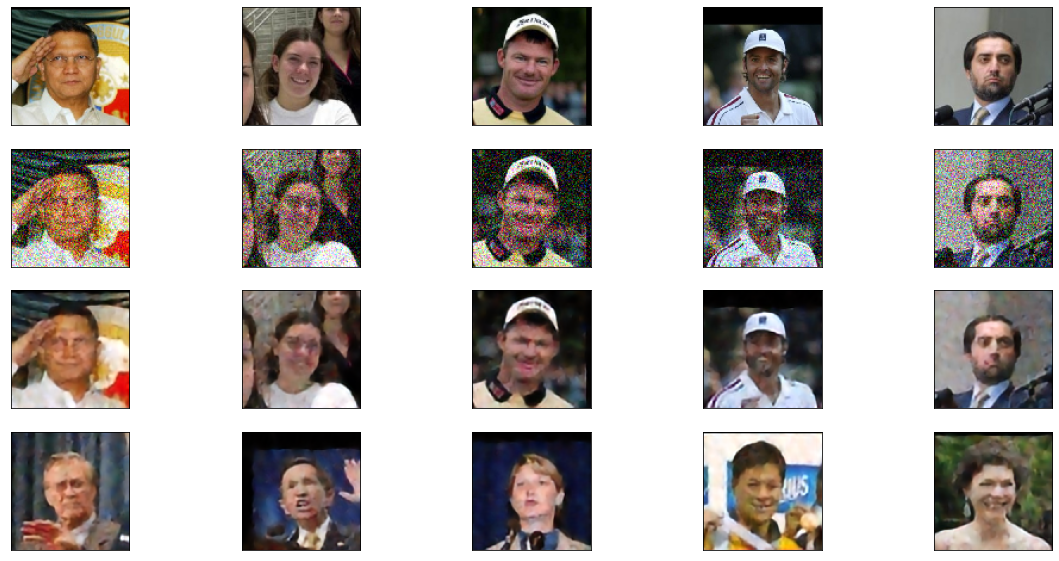

In [ ]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(4, n, i+1)
  plt.imshow(val_x[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(4, n, i+1+n)
  plt.imshow(x_val_noisy[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(4, n, i+1+(2*n))
  plt.imshow(predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(4, n, i+1+(3*n))
  plt.imshow(predictions_test[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()